# Experiment 9
## Demonstration of association rule generation on Groceries dataset for Market Basket Analysis using Apriori algorithm.

## Apriori is an unsupervised learning algorithm that is used for finding association among various items.

In [164]:
# Importing required libraries
import pandas as pd
# For getting T,F values of dataset
from mlxtend.preprocessing import TransactionEncoder
# Importing Algorithm
from mlxtend.frequent_patterns import apriori

## We have various category and we need to find the association between this categories of data using apriori algorithm.
## Dataset also contains string data so we will convert it to boolean data so that we can give it to algorithm for evaluation.
## If we will directly import dataset, in place of missing values it will replace it with NaN but the algorithm will not work with NaN values so we set the na_filter as False so that it will import data as it is instead of replacing with NaN.

In [165]:
# Reading CSV file
data = pd.read_csv("Market_Basket_Optimisation.csv", na_filter=False)
print("Dataset is:\n",data.head(n=6))

# We need to give dataframe in a tabular format with True and False
# Converting to numpy array so that we can later convert to Boolean Values
data = data.to_numpy()
print("\nDataset after converting to Numpy Array is:\n",data)

Dataset is:
               shrimp       almonds     avocado    vegetables mix green grapes  \
0            burgers     meatballs        eggs                                  
1            chutney                                                            
2             turkey       avocado                                              
3      mineral water          milk  energy bar  whole wheat rice    green tea   
4     low fat yogurt                                                            
5  whole wheat pasta  french fries                                              

  whole weat flour yams cottage cheese energy drink tomato juice  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  
5          

## Converting String Values to Boolean Values in dataset using Transaction Encoder.

<h2>A transaction encoder is a tool that can convert transaction data into a format that is suitable for machine learning algorithms. Transaction data is typically a list of lists, where each sublist represents a transaction that contains one or more items. For example, a transaction data set might look like this:</h2>
<h3>

```python
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
```

</h3>
<h2>A transaction encoder can transform this data into a one-hot encoded NumPy boolean array, where each row represents a transaction and each column represents an item. The value of each cell is True if the item is present in the transaction, and False otherwise. For example, the transaction encoder output for the above data set might look like this:</h2>
<h2>
It will print according to unique categories in dataset which are: </h2>
<h3>

```
['Apple', 'Corn', 'Dill', 'Eggs', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Unicorn', 'Yogurt']
```
</h3>

<h3>

```python
array([[False False False  True False  True  True  True  True False  True]
       [False False  True  True False  True False  True  True False  True]
       [ True False False  True False  True  True False False False False]
       [False  True False False False  True  True False False  True  True]
       [False  True False  True  True  True False False  True False False]])
```

</h3>

<h2>This format is more convenient for applying machine learning algorithms, such as association rule mining, clustering, or classification. One example of a transaction encoder in Python is the TransactionEncoder class from the mlxtend library. Another example is the OneHotEncoder class from the sklearn library .</h2>

## One Hot Encoder

<h2>
A one-hot encoder is a tool used to convert categorical data into a binary vector. Each unique value in the categorical variable is assigned a new column, and the value in that column is 1 if the original value matches the column's category, and 0 otherwise ¹.

Here is an example of how one-hot encoding works:

Suppose we have a dataset with a categorical variable called "Fruit" that has three possible values: "Apple", "Banana", and "Orange". We can use a one-hot encoder to convert this variable into a binary vector. The output would look like this:

| **Fruit_Apple** | **Fruit_Banana** | **Fruit_Orange** |
|----------------|-----------------|------------------|
| 1              | 0               | 0                |
| 0              | 1               | 0                |
| 1              | 0               | 0                |
| 0              | 0               | 1                |
| 0              | 0               | 1                |

As you can see, each unique value in the "Fruit" variable has been assigned a new column, and the value in that column is 1 if the original value matches the column's category, and 0 otherwise. This format is more convenient for applying machine learning algorithms, such as association rule mining, clustering, or classification .

</h2>

## Difference between Transaction and One Hot Encoder
<h2>
A transaction encoder and a one-hot encoder are both tools used to convert categorical data into a format that can be used by machine learning algorithms. However, they differ in the way they represent the data.

A transaction encoder is used to convert transaction data into a one-hot encoded NumPy boolean array, where each row represents a transaction and each column represents an item. The value of each cell is True if the item is present in the transaction, and False otherwise.

On the other hand, a one-hot encoder is used to convert categorical data into a binary vector with at most a single one-value. Each unique value in the categorical variable is assigned a new column, and the value in that column is 1 if the original value matches the column's category, and 0 otherwise.

In summary, a transaction encoder is used to convert transaction data into a one-hot encoded NumPy boolean array, while a one-hot encoder is used to convert categorical data into a binary vector. Both encoders are useful for preparing data for machine learning algorithms, depending on the nature of the data.

</h2>

In [166]:
tran_enc = TransactionEncoder()

# Doesn't mention name of columns(By Default)
array = tran_enc.fit(data).transform(data)
print("Converted Array is:\n",array)

# Seeing the name of columns
columns = tran_enc.columns_
print("\nName of columns are:\n",columns)

Converted Array is:
 [[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False  True False]]

Name of columns are:
 ['', ' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 

## Now we will create a dataframe with values and column names
## First column is useless so we drop it (Only used for index values)

In [167]:
df = pd.DataFrame(array,columns=columns).drop([''],axis=1)
print("Dataframe is:\n",df)

Dataframe is:
        asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0          False    False              False      False    False        False   
1          False    False              False      False    False        False   
2          False    False              False      False     True        False   
3          False    False              False      False    False        False   
4          False    False              False      False    False        False   
...          ...      ...                ...        ...      ...          ...   
7495       False    False              False      False    False        False   
7496       False    False              False      False    False        False   
7497       False    False              False      False    False        False   
7498       False    False              False      False    False        False   
7499       False    False              False      False    False        False   

      bacon 

## Calculating Support values is a part of this algorithm
## Passing arguments to algorithm
## Value of min_support is greater than 0
<h2>
After setting this value to 0.05, we will get association of multiple columns
By default use_colnames(Parameter for giving name to columns) value is False
We explicitly needs to set that to True to get column names.</h2>


## Min Support

 The `min_support` parameter is a **threshold** that determines which itemsets are considered frequent enough to be included in the output. It is usually expressed as a **fraction** of the total number of transactions in the dataset. For example, if `min_support` is set to 0.01, then only the itemsets that appear in at least 1% of the transactions will be returned by the algorithm .

The choice of `min_support` depends on the characteristics of the dataset and the goal of the analysis. A higher value of `min_support` will result in fewer and larger itemsets, while a lower value will result in more and smaller itemsets. There is no definitive rule for choosing the optimal value of `min_support`, but it is advisable to experiment with different values and compare the results.

In [168]:
# For ignoring warnings
import warnings
warnings.simplefilter("ignore")

## Observations in case of different values of min support:-
- In case of 0.01 we are getting 259 rows.
- In case of 0.04 we are getting 35 rows.
- In case of 0.05 we are getting 28 rows.
- In case of 0.07 we are getting 16 rows.

In [169]:
# With min_support 0.01

apriori_algo_001 = apriori(df, min_support = 0.01, use_colnames=True)

print("Apriori Algorihtm With min_support 0.01:\n")
print("After applying algorithm with min_support 0.01 dataset is:\n",apriori_algo_001)
print("\nTotal Count of values with min_support 0.01 is:",apriori_algo_001.count() )

# With min_support 0.04

apriori_algo_004 = apriori(df, min_support = 0.04, use_colnames=True)

print("Apriori Algorihtm With min_support 0.04:\n")
print("After applying algorithm with min_support 0.04 dataset is:\n",apriori_algo_004)
print("\nTotal Count of values with min_support 0.04 is:",apriori_algo_004.count() )

# With min_support 0.05

apriori_algo_005 = apriori(df, min_support = 0.05, use_colnames=True)

print("Apriori Algorihtm With min_support 0.05:\n")
print("After applying algorithm with min_support 0.05 dataset is:\n",apriori_algo_005)
print("\nTotal Count of values with min_support 0.05 is:",apriori_algo_005.count() )

# With min_support 0.07

apriori_algo_007 = apriori(df, min_support = 0.07, use_colnames=True)

print("Apriori Algorihtm With min_support 0.07:\n")
print("After applying algorithm with min_support 0.07 dataset is:\n",apriori_algo_007)
print("\nTotal Count of values with min_support 0.07 is:",apriori_algo_007.count() )

Apriori Algorihtm With min_support 0.01:

After applying algorithm with min_support 0.01 dataset is:
       support                                 itemsets
0    0.020267                                (almonds)
1    0.033200                                (avocado)
2    0.010800                         (barbecue sauce)
3    0.014267                              (black tea)
4    0.011467                             (body spray)
..        ...                                      ...
254  0.011067       (milk, mineral water, ground beef)
255  0.017067  (mineral water, spaghetti, ground beef)
256  0.015733         (milk, mineral water, spaghetti)
257  0.010267    (mineral water, spaghetti, olive oil)
258  0.011467     (mineral water, pancakes, spaghetti)

[259 rows x 2 columns]

Total Count of values with min_support 0.01 is: support     259
itemsets    259
dtype: int64
Apriori Algorihtm With min_support 0.04:

After applying algorithm with min_support 0.04 dataset is:
      support      

## Finding the length of items.

In [170]:
# With min_support 0.01

support_df_001 = apriori(df, min_support = 0.01, use_colnames = True)

# Getting number of elements in dataframe
support_df_001["Length"] = support_df_001['itemsets'].apply(lambda x:len(x))
print("Support values for min_support 0.01 are:\n",support_df_001)


# With min_support 0.04

support_df_004 = apriori(df, min_support = 0.04, use_colnames = True)

# Getting number of elements in dataframe
support_df_004["Length"] = support_df_004['itemsets'].apply(lambda x:len(x))
print("\nSupport values for min_support 0.04 are:\n",support_df_004)

# With min_support 0.05

support_df_005 = apriori(df, min_support = 0.05, use_colnames = True)

# Getting number of elements in dataframe
support_df_005["Length"] = support_df_005['itemsets'].apply(lambda x:len(x))
print("\nSupport values for min_support 0.05 are:\n",support_df_005)

# With min_support 0.07

support_df_007 = apriori(df, min_support = 0.07, use_colnames = True)

# Getting number of elements in dataframe
support_df_007["Length"]=support_df_007['itemsets'].apply(lambda x:len(x))
print("\nSupport values for min_support 0.07 are:\n",support_df_007)

Support values for min_support 0.01 are:
       support                                 itemsets  Length
0    0.020267                                (almonds)       1
1    0.033200                                (avocado)       1
2    0.010800                         (barbecue sauce)       1
3    0.014267                              (black tea)       1
4    0.011467                             (body spray)       1
..        ...                                      ...     ...
254  0.011067       (milk, mineral water, ground beef)       3
255  0.017067  (mineral water, spaghetti, ground beef)       3
256  0.015733         (milk, mineral water, spaghetti)       3
257  0.010267    (mineral water, spaghetti, olive oil)       3
258  0.011467     (mineral water, pancakes, spaghetti)       3

[259 rows x 3 columns]

Support values for min_support 0.04 are:
      support                      itemsets  Length
0   0.087200                     (burgers)       1
1   0.081067                     

## Checking which rows are having length greater than 2 and support value greater than 0.01.
## This is the final result for this algorithm as its main purpose is to find association.

## Observation

### Here we are taking datasets by different min_support values but the end output will be same for them, the only difference will be in the rows which are already removed from the algorithm because of min_support value in the previous algorihtm.

In [171]:
# With min_support 0.01

print("Apriori Algorihtm With min_support 0.01:\n")
print("Rows which are having length greater than 2 and support value greater than 0.01 are:\n")
print(support_df_001[(support_df_001['Length']>=2) & (support_df_001['support'] > 0.01)])

# With min_support 0.04

print("\nApriori Algorihtm With min_support 0.04:\n")
print("Rows which are having length greater than 2 and support value greater than 0.05 are:\n")
print(support_df_004[(support_df_004['Length']>=2) & (support_df_004['support'] > 0.05)])

# With min_support 0.05

print("\nApriori Algorihtm With min_support 0.05:\n")
print("Rows which are having length greater than 2 and support value greater than 0.01 are:\n")
print(support_df_005[(support_df_005['Length']>=2) & (support_df_005['support'] > 0.06)])

# With min_support 0.07

print("\nApriori Algorihtm With min_support 0.07:\n")
print("Rows which are having length greater than 2 and support value greater than 0.01 are:\n")
print(support_df_007[(support_df_007['Length']>=2) & (support_df_007['support']>0.08)])

Apriori Algorihtm With min_support 0.01:

Rows which are having length greater than 2 and support value greater than 0.01 are:

      support                                 itemsets  Length
75   0.011467                 (mineral water, avocado)       2
76   0.011467                          (cake, burgers)       2
77   0.017067                     (burgers, chocolate)       2
78   0.028800                          (eggs, burgers)       2
79   0.022000                  (burgers, french fries)       2
..        ...                                      ...     ...
254  0.011067       (milk, mineral water, ground beef)       3
255  0.017067  (mineral water, spaghetti, ground beef)       3
256  0.015733         (milk, mineral water, spaghetti)       3
257  0.010267    (mineral water, spaghetti, olive oil)       3
258  0.011467     (mineral water, pancakes, spaghetti)       3

[182 rows x 3 columns]

Apriori Algorihtm With min_support 0.04:

Rows which are having length greater than 2 and s

## Now we will see the association count of items

In [172]:
# With min_support 0.01

count_2_item_support_001 = support_df_001[(support_df_001['Length'] == 2) & (support_df_001['support'] > 0.01)].count()
print("Count of Two Items with association more than 0.01 is: ", count_2_item_support_001)

count_3_item_support_001 = support_df_001[(support_df_001['Length'] == 3) & (support_df_001['support'] > 0.01)].count()
print("\nCount of Three Items with association more than 0.01 is: ", count_3_item_support_001)

Count of Two Items with association more than 0.01 is:  support     165
itemsets    165
Length      165
dtype: int64

Count of Three Items with association more than 0.01 is:  support     17
itemsets    17
Length      17
dtype: int64


## Finding the items with highest association

In [173]:
# Item with Highest association
print("Item with Highest association Value is:\n",support_df_001.loc[support_df_001['support'].idxmax()])

# 2 Items with Highest association
print("\nTwo items with Highest association is:\n", support_df_001[(support_df_001['Length']==2) & (support_df_001['support'] > 0.01)].max())

# 3 Items with Highest association
print("\nThree items with Highest association is:\n", support_df_001[(support_df_001['Length']==3) & (support_df_001['support'] > 0.01)].max())

Item with Highest association Value is:
 support            0.238267
itemsets    (mineral water)
Length                    1
Name: 46, dtype: object

Two items with Highest association is:
 support                          0.059733
itemsets    (spaghetti, whole wheat rice)
Length                                  2
dtype: object

Three items with Highest association is:
 support                                 0.017067
itemsets    (mineral water, pancakes, spaghetti)
Length                                         3
dtype: object


## Data Visualization for association scores

In [174]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Bar Plot of Support Values greater than 0.03 and two items.

## Since there are many 2 items association in dataset so we will only visualize items with strong association.

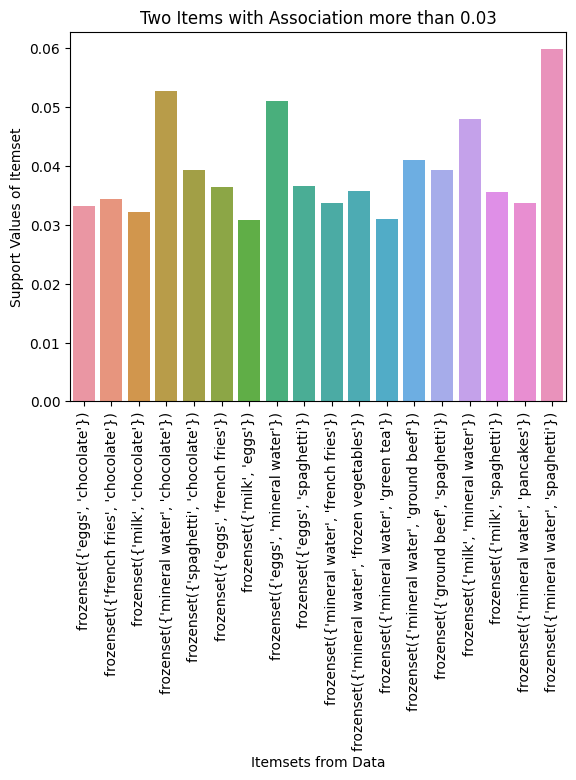

In [175]:
# Filtering Dataset
support_df_001_2 = support_df_001[(support_df_001['Length'] == 2) & (support_df_001['support'] >= 0.03)]

sns.barplot(x= support_df_001_2['itemsets'],y = support_df_001_2['support'], data = support_df_001_2)

# Adding Labels
plt.xlabel("Itemsets from Data")
plt.ylabel("Support Values of Itemset")
plt.xticks(rotation = 'vertical')
plt.title("Two Items with Association more than 0.03")
plt.show()

## Bar Plot of Support Values greater than 0.01 and three items.

## Since 3 items association in dataset is less than 0.03 and very few values so we will visualize items with association more than 0.01 only.

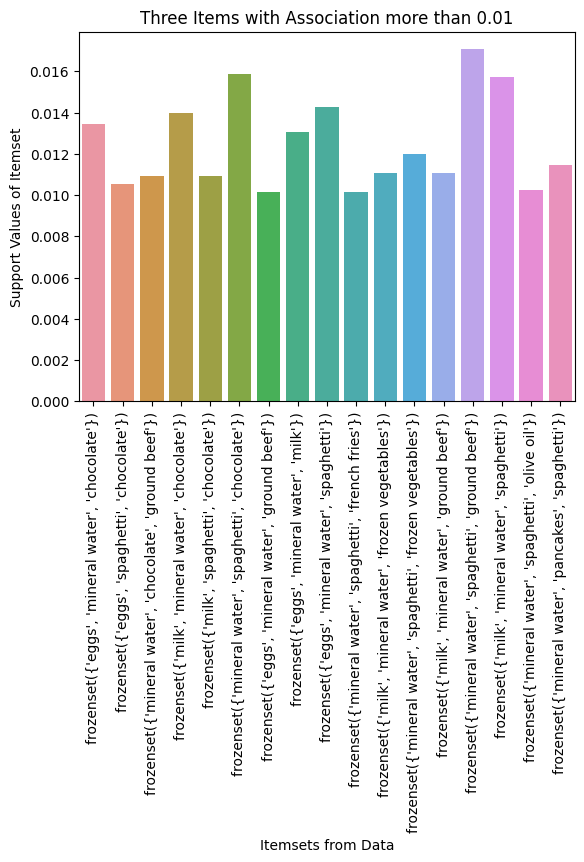

In [176]:
# Filtering Dataset
support_df_001_3 = support_df_001[(support_df_001['Length'] == 3) & (support_df_001['support'] >= 0.01)]

sns.barplot(x= support_df_001_3['itemsets'],y = support_df_001_3['support'], data = support_df_001_3)

# Adding Labels
plt.xlabel("Itemsets from Data")
plt.ylabel("Support Values of Itemset")
plt.xticks(rotation = 'vertical')
plt.title("Three Items with Association more than 0.01")
plt.show()

## Now we will visualize a pie chart which will show the association score for values.

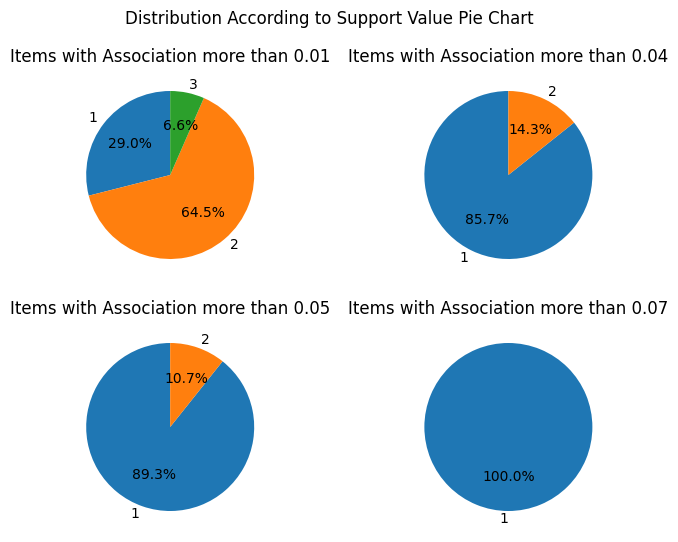

In [177]:
# Setting figure size
plt.figure(figsize = (8,6))

plt.subplot(2,2,1)

# Plot 1
# Assuming support_df_001 is your DataFrame
df_pie = support_df_001.groupby("Length").size()

# Create a pie chart
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title("Items with Association more than 0.01")

plt.subplot(2,2,2)

# Plot 2
# Assuming support_df_001 is your DataFrame
df_pie = support_df_004.groupby("Length").size()

# Create a pie chart
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title("Items with Association more than 0.04")

plt.subplot(2,2,3)

# Plot 3
# Assuming support_df_001 is your DataFrame
df_pie = support_df_005.groupby("Length").size()

# Create a pie chart
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title("Items with Association more than 0.05")

plt.subplot(2,2,4)

# Plot 4
# Assuming support_df_001 is your DataFrame
df_pie = support_df_007.groupby("Length").size()

# Create a pie chart
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title("Items with Association more than 0.07")

# Adding title to plot
plt.suptitle("Distribution According to Support Value Pie Chart")

plt.show()